# CENSUS

A census is the procedure of systematically calculating, acquiring and recording information about the members of a given population. This term is used mostly in connection with national population and housing censuses; other common censuses include the census of agriculture, and other censuses such as the traditional culture, business, supplies, and traffic censuses. The United Nations defines the essential features of population and housing censuses as "individual enumeration, universality within a defined territory, simultaneity and defined periodicity", and recommends that population censuses be taken at least every ten years. United Nations recommendations also cover census topics to be collected, official definitions, classifications and other useful information to co-ordinate international practices.




# DATA DESCRIPTION


* Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.


* Description of fnlwgt (final weight) :

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

  * A single cell estimate of the population 16+ for each state.

  * Controls for Hispanic Origin by age and sex.

  * Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



# Loading the Dataset

In [60]:
import pandas as pd
import numpy as np

path ='https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv'
df= pd.read_csv(path)


In [ ]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income,Capital Diff
32555,Adult,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,Normal Hours,United-States,<=50K,Minor
32556,Adult,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,Normal Hours,United-States,>50K,Minor
32557,Old,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,Normal Hours,United-States,<=50K,Minor
32558,Young,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,Lesser Hours,United-States,<=50K,Minor
32559,Old,Self-emp-inc,287927,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,Female,Normal Hours,United-States,>50K,Major


In [ ]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Details About The Columns

     1. Age

This Column shows the Individuals Age Years

     2. Work Class

This Column shows the Individuals Occupoation

     3. Fnlwgt

This Column shows the Individuals Final Wieght 

     4. Education

This Column shows the Individuals Education Level

     5. Education_num

This Column shows the Individuals Educations Num

     6. Marital_Status

This Column shows the Individuals Maritasl status That is whether married or not 

     7. Occupation

This Column shows the Individuals Details of the Work Occupation 

    8. Relationship

This Column shows the Individuals Realtionship whith the Individual

    9. Sex 

This Column shows the Individuals Sex that is which gender he belongs to

    10. Race

This Column shows the Individuals Race or Region of origin details

    11. Capital Gain

This Column shows the Individuals Capital gain or net worth

    12. Capital Loss

This Column shows the Individuals Capital loss 

    13. Hours Per Week

This Column shows the Individuals working hours per week 

    14. Native_Country

This Column shows the Individuals Shows the country or statte from which he belongs 

    15. Income

This Column shows the Individuals income is more or less than 50k


# Data Exploration
 

In [ ]:
cat_cols=df.select_dtypes([object])

for col in cat_cols.columns:
    print(col)
    print(df[col].value_counts())
    print('--------------------------------------------------------------------------')

Workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
--------------------------------------------------------------------------
Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
--------------------------------------------------------------------------
Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed        

* OUTCOME : -
    
Native.Country, Occupation,Workclass
     
      * It has unknown values represented by ?

Education

     * 9th, 10th, 11th, 12th comes under HighSchool Grad but it has mentioned separately
     
     * Creating Elementary object for 1st-4th, 5th-6th, 7th-8th
Marital Status

     * Married-civ-spouse,Married-spouse-absent,Married-AF-spouse comes under category Married

     * Divorced, separated again comes under category separated.
Workclass

     * Self-emp-not-inc, Self-emp-inc comes under category self employed

     * Local-gov,State-gov,Federal-gov comes under category goverment emloyees

Removing the rows with no Values ( ? )

In [61]:
df = df.drop(df[df['Native_country'] == ' ?'].index)
df = df.drop(df[df['Occupation'] == ' ?'].index)
df = df.drop(df[df['Workclass'] == ' ?'].index)

In [ ]:
df['Native_country'].value_counts()

 United-States                 27503
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [ ]:
df['Occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3720
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: Occupation, dtype: int64

In [ ]:
df['Workclass'].value_counts()

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1278
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: Workclass, dtype: int64

We can see that there are only few values present in both the columns So instead of two seperate columns we merge them into one and categorize them in three categories

In [ ]:
df['Hours_per_week'].value_counts()

40    14250
50     2718
45     1753
60     1405
35     1184
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64

In [62]:
df['Hours_per_week'] = pd.cut(df['Hours_per_week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

In [ ]:
df['Hours_per_week'].value_counts()

Normal Hours    16581
Extra Hours      9197
Lesser Hours     4383
Name: Hours_per_week, dtype: int64

In [63]:
df['Capital Diff'] = df['Capital_gain'] - df['Capital_loss']
df.drop(['Capital_gain'], axis = 1, inplace = True)
df.drop(['Capital_loss'], axis = 1, inplace = True)
df['Capital Diff'] = pd.cut(df['Capital Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])

In [ ]:
df['Age'].value_counts()

36    852
31    851
33    837
34    836
37    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: Age, Length: 72, dtype: int64

In [64]:
df['Age'] = pd.cut(df['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

In [ ]:
df['Age'].value_counts()

Adult    18801
Old       5692
Young     5668
Name: Age, dtype: int64

In [ ]:
df['Education'].value_counts()

 HS-grad         9840
 Some-college    6678
 Bachelors       5043
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: Education, dtype: int64

In [ ]:
education_classes = df['Education'].unique()
for edu_class in education_classes:
    print("For {}, the Education Number is {}"
          .format(edu_class, df[df['Education'] == edu_class]['Education_num'].unique()))

For  Bachelors, the Education Number is [13]
For  HS-grad, the Education Number is [9]
For  11th, the Education Number is [7]
For  Masters, the Education Number is [14]
For  9th, the Education Number is [5]
For  Some-college, the Education Number is [10]
For  Assoc-acdm, the Education Number is [12]
For  7th-8th, the Education Number is [4]
For  Doctorate, the Education Number is [16]
For  Assoc-voc, the Education Number is [11]
For  Prof-school, the Education Number is [15]
For  5th-6th, the Education Number is [3]
For  10th, the Education Number is [6]
For  Preschool, the Education Number is [1]
For  12th, the Education Number is [8]
For  1st-4th, the Education Number is [2]


From the above we discovered that Education Number and Education are just the same. So, I can drop any one column. Also, I'll combine all information from Preschool to 12th as they can be considered of one class who have no college/university level education.

In [65]:
df.drop(['Education_num'], axis = 1, inplace = True)
df['Education'].replace([' 7th-8th', ' 5th-6th',' 1st-4th', ' Preschool',' 11th', ' 9th', ' 10th', ' 12th'],
                             ' School', inplace = True)

df['Education'].value_counts()

 HS-grad         9840
 Some-college    6678
 Bachelors       5043
 School          3741
 Masters         1627
 Assoc-voc       1307
 Assoc-acdm      1008
 Prof-school      542
 Doctorate        375
Name: Education, dtype: int64

In [ ]:
df['Native_country'].value_counts()

 United-States                 27503
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

We can see that The majority of adults are from United States. Thus, we can distribute the column with values as either United States or Other.

In [66]:
Native_countrys = np.array(df['Native_country'].unique())
Native_countrys = np.delete(Native_countrys, 0)
df['Native_country'].replace(Native_countrys, 'Other', inplace = True)

In [ ]:
df['Native_country'].value_counts()

 United-States    27503
Other              2658
Name: Native_country, dtype: int64

In [ ]:
df['Race'].value_counts()

 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: Race, dtype: int64

we can see that The dataset includes majority of information about White race while all other races are lesser in number. I'll combine all other race data into one class as Other.

In [67]:
df['Race'].unique()
df['Race'].replace([' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other'],' Other', inplace = True)

In [ ]:
df['Race'].value_counts()

 White    25932
 Other     4229
Name: Race, dtype: int64

In [ ]:
df

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income,Capital Diff
0,Adult,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,Lesser Hours,United-States,<=50K,Minor
1,Adult,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,Normal Hours,United-States,<=50K,Minor
2,Old,Private,234721,School,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,Normal Hours,United-States,<=50K,Minor
3,Adult,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Other,Female,Normal Hours,Other,<=50K,Minor
4,Adult,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,Normal Hours,United-States,<=50K,Minor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,Adult,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,Normal Hours,United-States,<=50K,Minor
32556,Adult,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,Normal Hours,United-States,>50K,Minor
32557,Old,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,Normal Hours,United-States,<=50K,Minor
32558,Young,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,Lesser Hours,United-States,<=50K,Minor


# Checking for the Columns containing Null , Blank Or Empty Values

In [4]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [ ]:
df.dtypes

Age               category
Workclass           object
Fnlwgt               int64
Education           object
Marital_status      object
Occupation          object
Relationship        object
Race                object
Sex                 object
Hours_per_week    category
Native_country      object
Income              object
Capital Diff      category
dtype: object

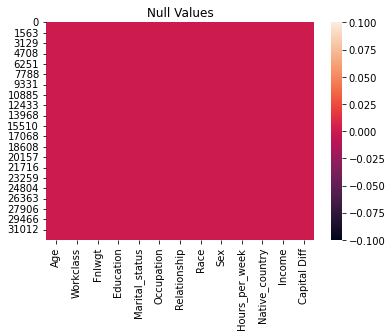

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

# Checking and Transforming the Data types of the Columns To Same DataTypes for Better Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30147 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             30147 non-null  category
 1   Workclass       30147 non-null  object  
 2   Fnlwgt          30147 non-null  int64   
 3   Education       30147 non-null  object  
 4   Marital_status  30147 non-null  object  
 5   Occupation      30147 non-null  object  
 6   Relationship    30147 non-null  object  
 7   Race            30147 non-null  object  
 8   Sex             30147 non-null  object  
 9   Hours_per_week  30147 non-null  category
 10  Native_country  30147 non-null  object  
 11  Income          30147 non-null  object  
 12  Capital Diff    30147 non-null  category
dtypes: category(3), int64(1), object(9)
memory usage: 3.6+ MB


In [5]:
df.describe(include=['O'])

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,30161,30161,30161,30161,30161,30161,30161,30161,30161
unique,7,9,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22286,9840,14065,4038,12463,25932,20379,27503,22653


In [6]:
df.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,School,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [68]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

list1=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']
for val in list1:
  df[val]=le.fit_transform(df[val].astype(str))

In [ ]:
df.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income,Capital Diff
0,0,4,83311,2,2,3,0,1,1,1,0,0,1
1,0,2,215646,4,0,5,1,1,1,2,0,0,1
2,1,2,234721,7,2,5,0,0,1,2,0,0,1
3,0,2,338409,2,2,9,5,0,0,2,1,0,1
4,0,2,284582,5,2,3,5,1,0,2,0,0,1


# Exploratory Data Analysis

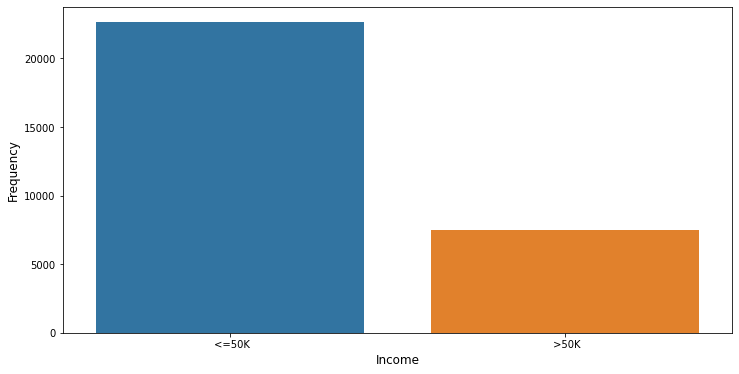

In [ ]:
plt.figure(figsize =(12,6));
sns.countplot(x = 'Income', data = df);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);

Our dataset has 25000 people earning <=50K i.e. 75% and remainng 25% earns more than 50K.

 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1278
 Self-emp-inc         1074
 Federal-gov           943
Name: Workclass, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


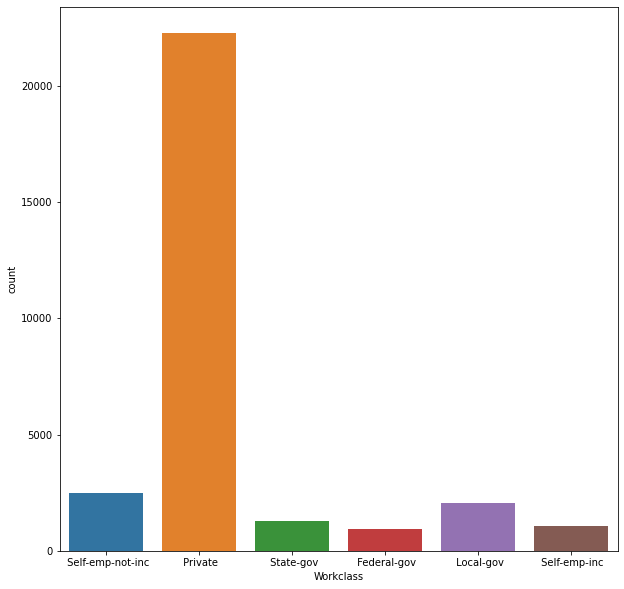

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df['Workclass'].value_counts())  
plt.figure(figsize=(10,10))
sns.countplot(df['Workclass'])
plt.show()

We can see that the private workclass person are more in compare to all 

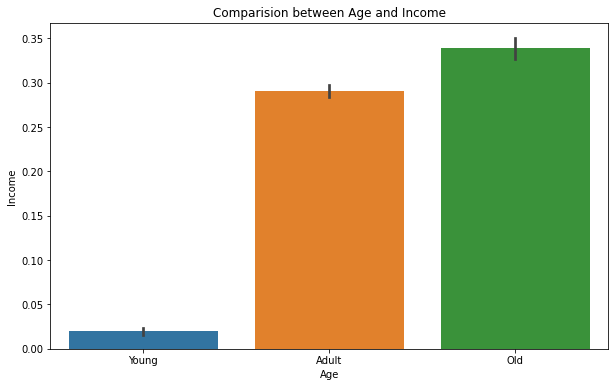

In [69]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Age and Income")
sns.barplot(x = "Age", y = "Income", data = df)
plt.show()

We can see that the age Group between 50
-
100 Years are more in numbers compared to the younger ones

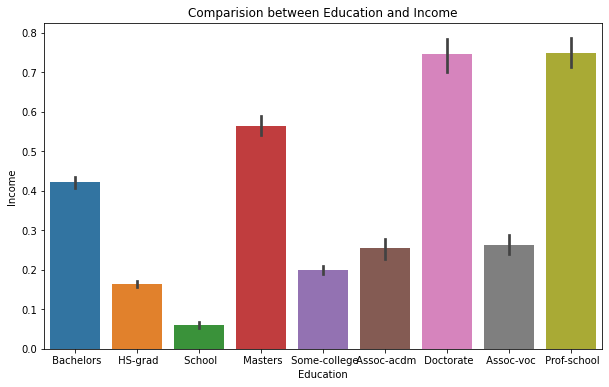

In [70]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Education and Income")
sns.barplot(x = "Education", y = "Income", data = df)
plt.show()

we can see that the educationis evenly distributed with Doctorate as the highest among all

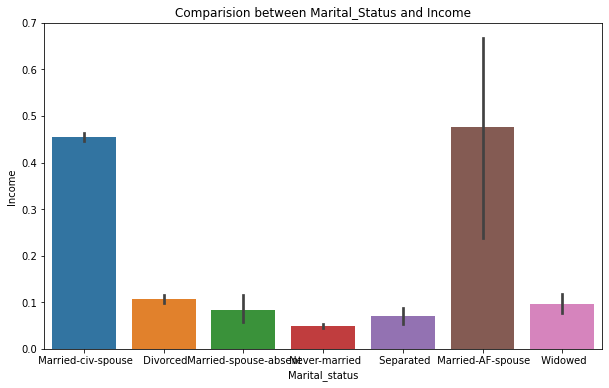

In [71]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Marital_Status and Income")
sns.barplot(x = "Marital_status", y = "Income", data = df)
plt.show()

We can see that the ratio of Married-Af-Spouse no's are too higher than any other 

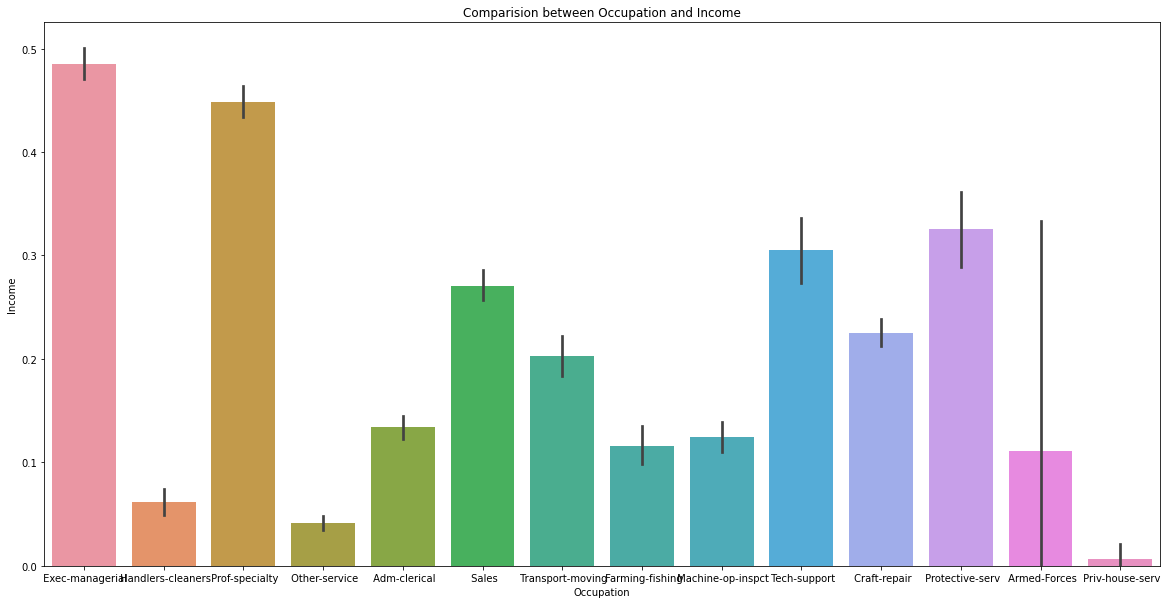

In [74]:
plt.figure(figsize = (20,10))
plt.title("Comparision between Occupation and Income")
sns.barplot(x = "Occupation", y = "Income", data = df)
plt.show()

We can see that the Occupation columnn has The Highest No of Exec Manager followed proffesor speciality..

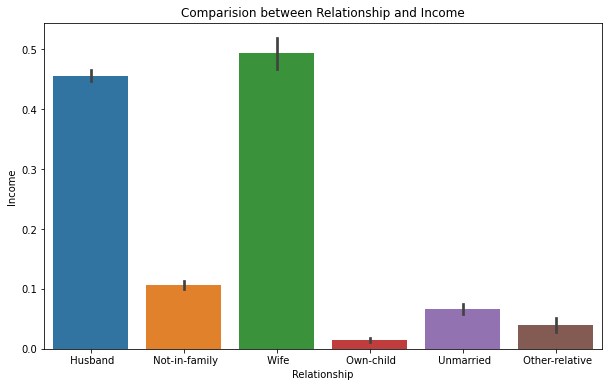

In [75]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Relationship and Income")
sns.barplot(x = "Relationship", y = "Income", data = df)
plt.show()

We can see that the in relationship[ wifes are the max in number

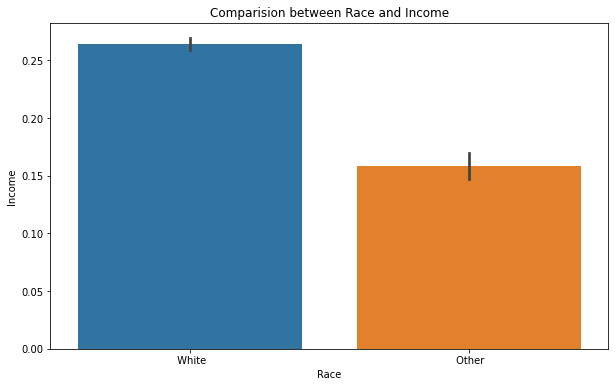

In [76]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Race and Income")
sns.barplot(x = "Race", y = "Income", data = df)
plt.show()

In context of race the white mens are the most in the census income ratio than any other combined

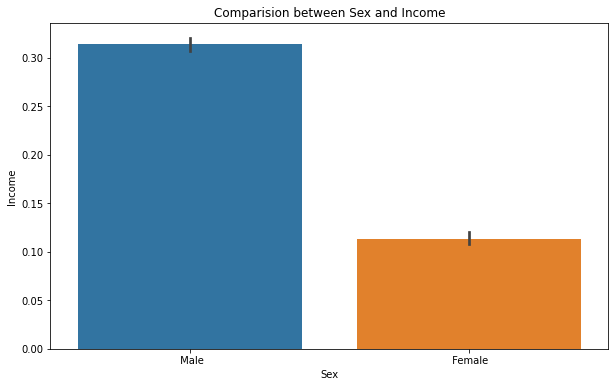

In [77]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Sex and Income")
sns.barplot(x = "Sex", y = "Income", data = df)
plt.show()

In context of the sex ratio we can see that the Male are morein number than any other 

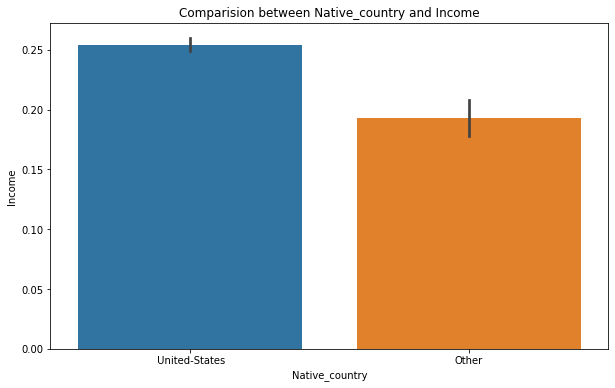

In [78]:
plt.figure(figsize = (10,6))
plt.title("Comparision between Native_country and Income")
sns.barplot(x = "Native_country", y = "Income", data = df)
plt.show()

With respect to Native Country the ratio of Usa Citizen is much more higher than the others 

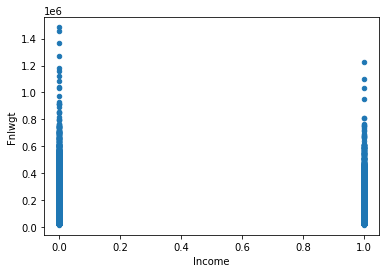

In [79]:
df.plot.scatter(x='Income',y='Fnlwgt')

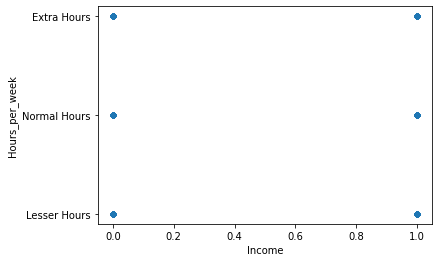

In [80]:
df.plot.scatter(x='Income',y='Hours_per_week')

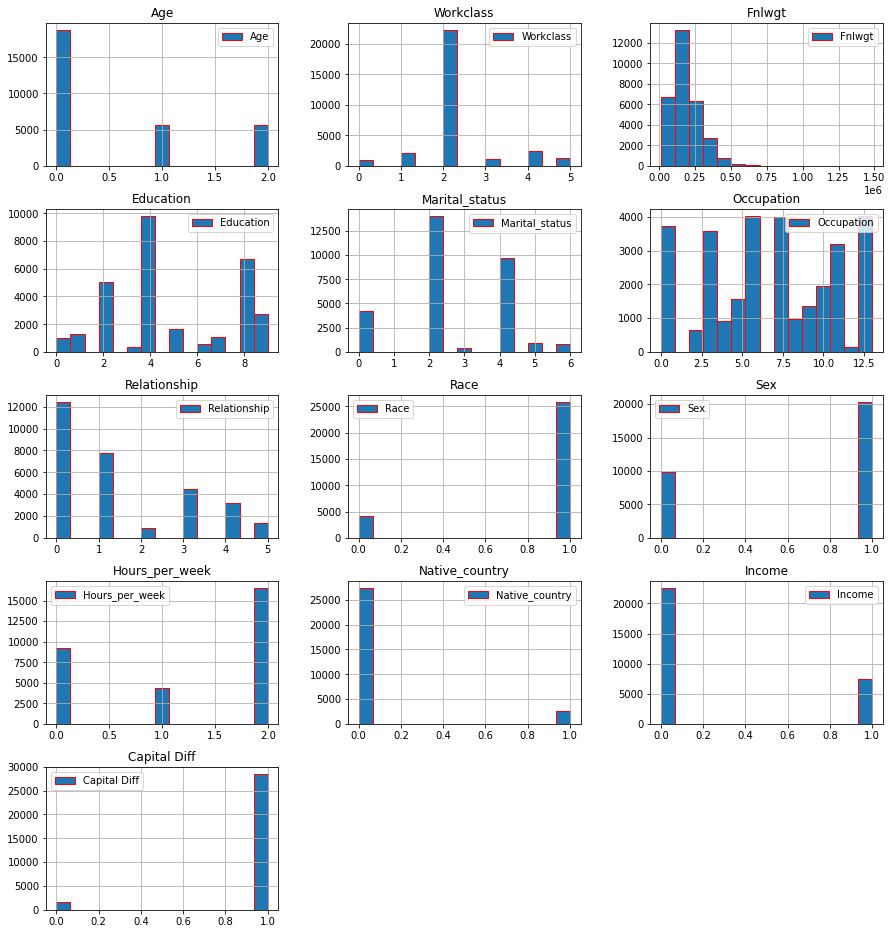

In [ ]:
df.hist(figsize=(15,30),edgecolor='red',layout=(9,3),bins=15,legend=True)
plt.show()

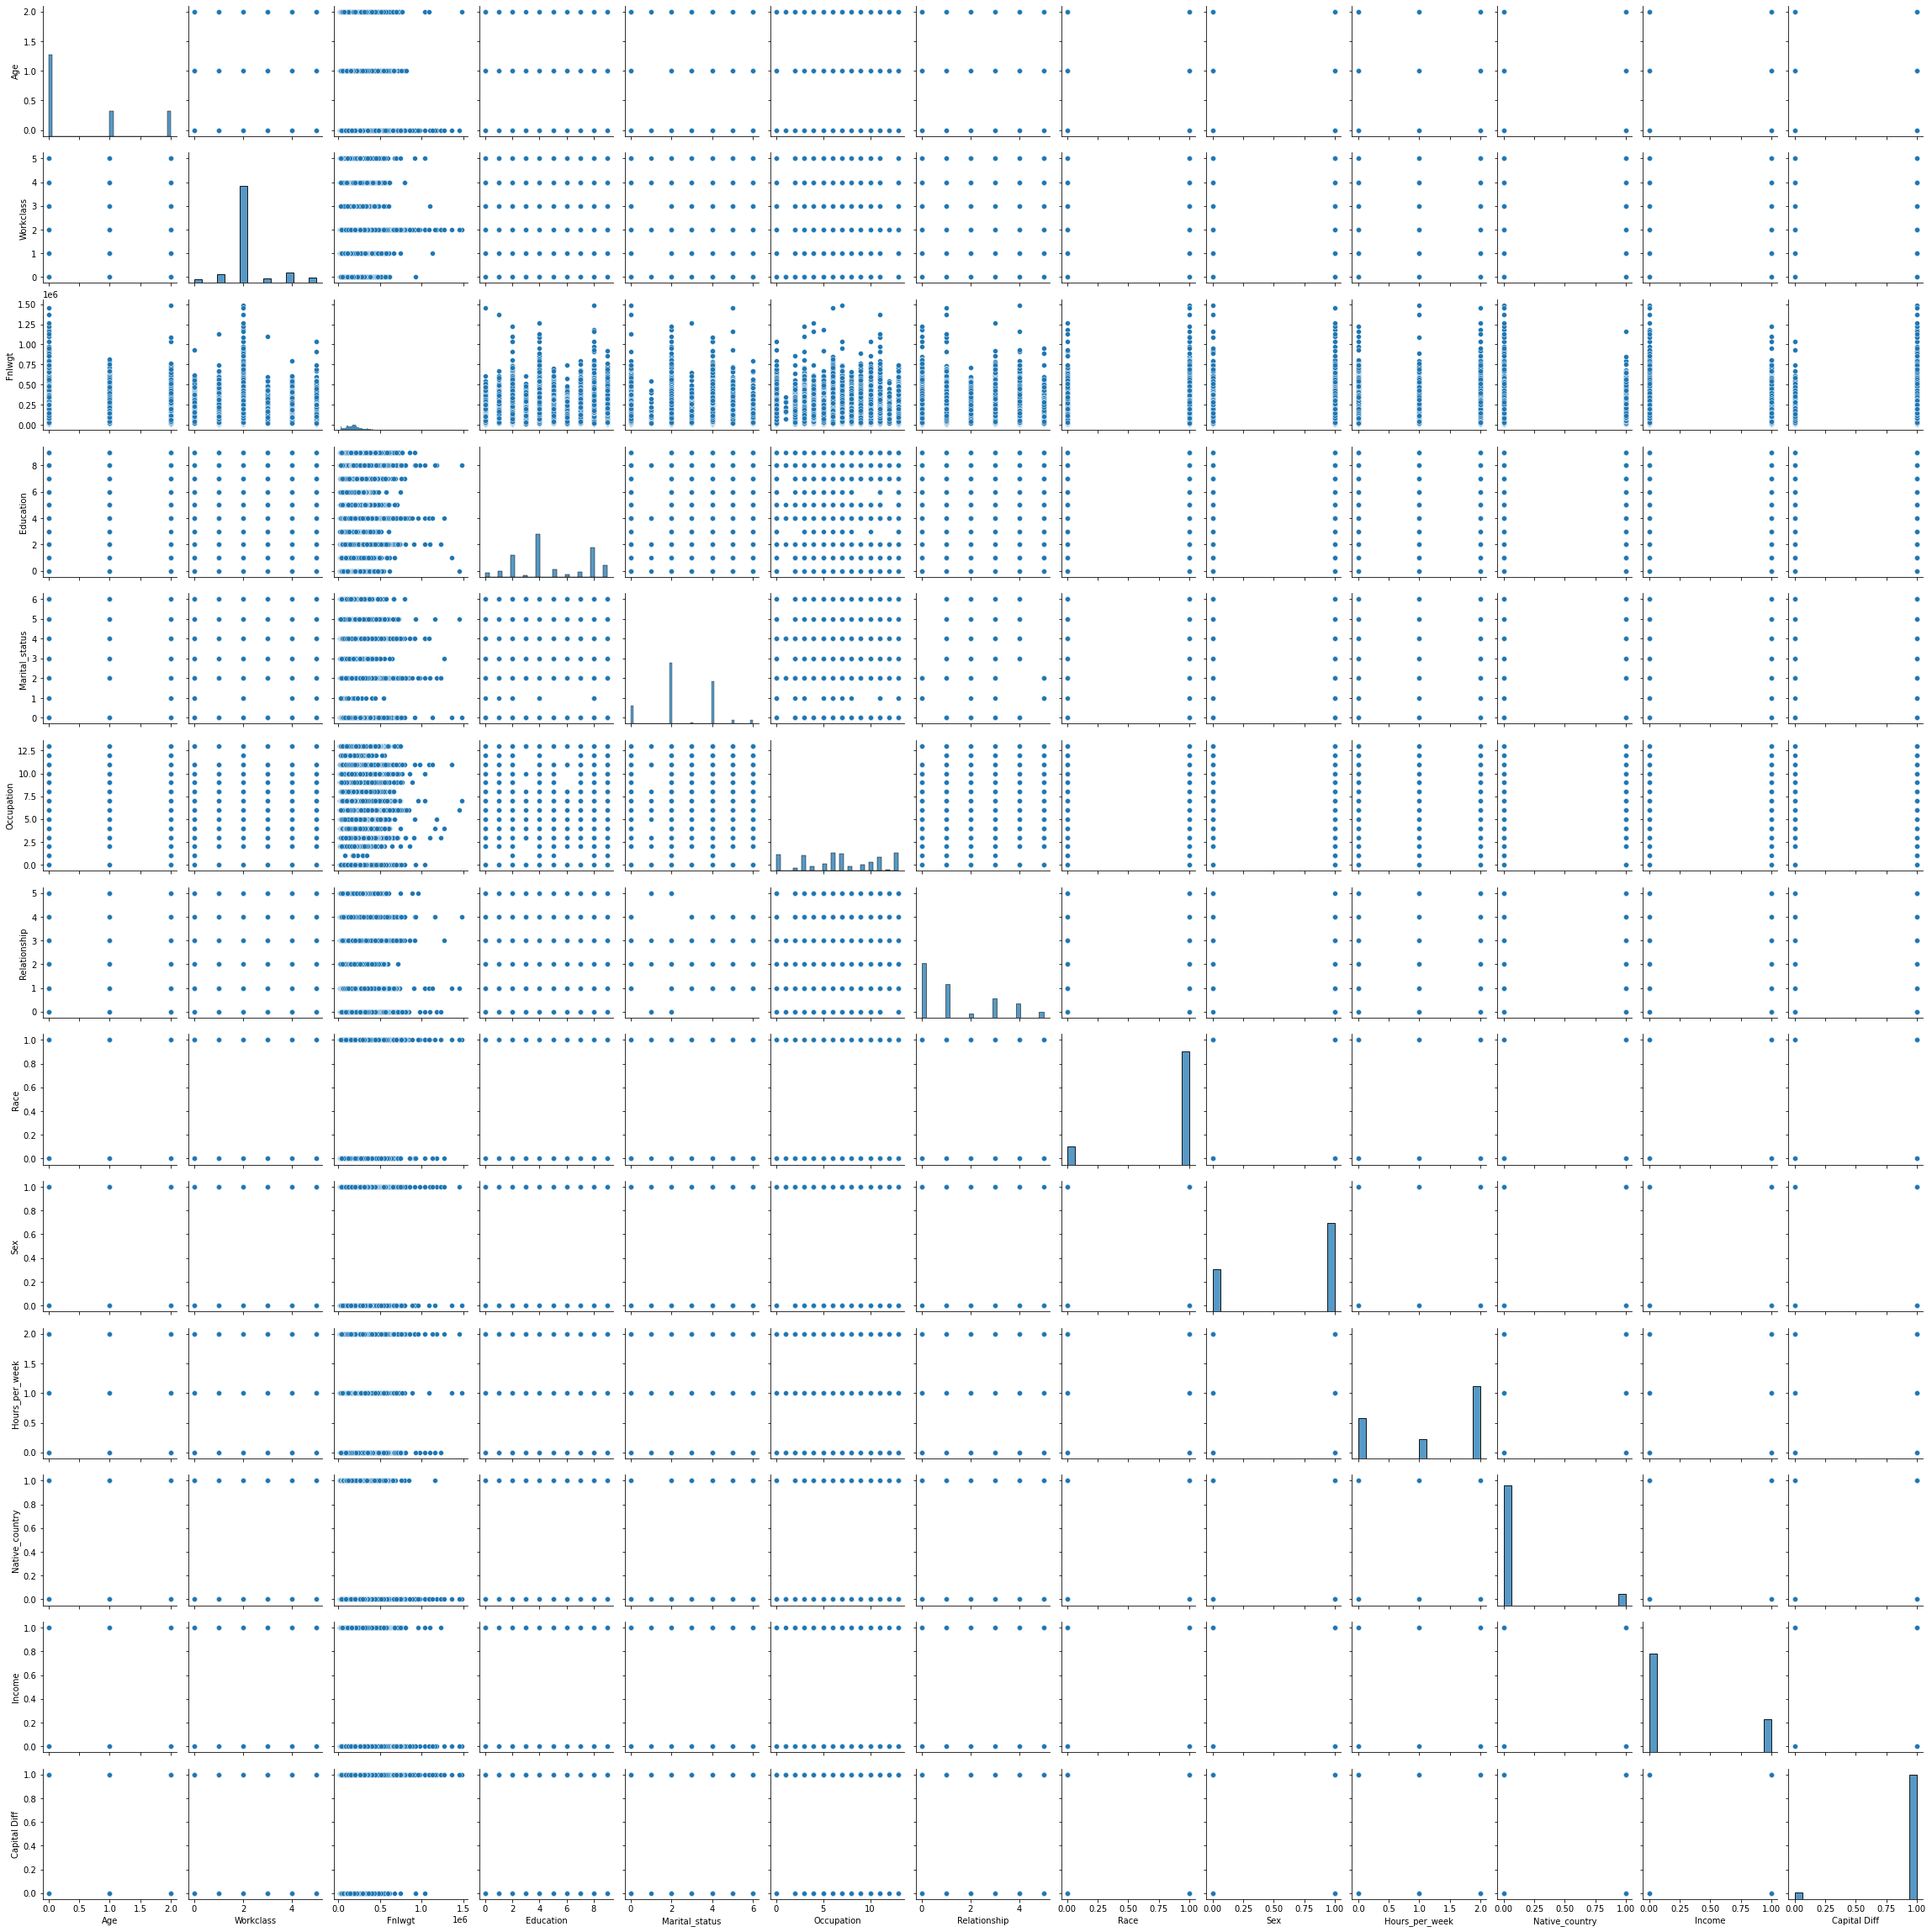

In [ ]:
sns.pairplot(df)

# Corealtion between features and target ' INCOME ' ( EDA )

In [8]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.080548,-0.076511,-0.052531,-0.276378,-0.005680,-0.246456,0.023373,0.081992,0.080154,0.060166,0.101599,-0.001905,0.242000
Workclass,0.080548,1.000000,-0.032395,0.004078,-0.034338,0.015719,-0.067401,0.044700,0.074917,0.035340,0.007226,0.050738,0.007644,0.018103
Fnlwgt,-0.076511,-0.032395,1.000000,0.017720,0.032197,0.000152,0.009289,-0.023882,0.025387,0.000427,-0.009757,-0.022889,-0.066709,-0.008978
Education,-0.052531,0.004078,0.017720,1.000000,0.052552,-0.032421,0.068534,-0.019259,-0.023156,-0.026007,-0.028945,-0.113353,-0.030771,-0.138675
Marital_status,-0.276378,-0.034338,0.032197,0.052552,1.000000,0.022702,0.177975,-0.068641,-0.119837,-0.042424,-0.035197,-0.189004,-0.025911,-0.193504
Occupation,-0.005680,0.015719,0.000152,-0.032421,0.022702,1.000000,-0.053742,0.000736,0.062350,0.022170,0.014597,0.018362,-0.003470,0.051551
Relationship,-0.246456,-0.067401,0.009289,0.068534,0.177975,-0.053742,1.000000,-0.117140,-0.584876,-0.058258,-0.063569,-0.257851,-0.010806,-0.251009
Race,0.023373,0.044700,-0.023882,-0.019259,-0.068641,0.000736,-0.117140,1.000000,0.089178,0.014351,0.023520,0.048533,0.124511,0.071666
Sex,0.081992,0.074917,0.025387,-0.023156,-0.119837,0.062350,-0.584876,0.089178,1.000000,0.048811,0.047017,0.231272,0.000612,0.216715
Capital_gain,0.080154,0.035340,0.000427,-0.026007,-0.042424,0.022170,-0.058258,0.014351,0.048811,1.000000,-0.032228,0.080432,0.008529,0.221200


In [9]:
# Coorelation with the Target Column Primary Fuel 

df.corr()['Income'].sort_values()

Relationship     -0.251009
Marital_status   -0.193504
Education        -0.138675
Fnlwgt           -0.008978
Workclass         0.018103
Native_country    0.023273
Occupation        0.051551
Race              0.071666
Capital_loss      0.150050
Sex               0.216715
Capital_gain      0.221200
Hours_per_week    0.229480
Age               0.242000
Income            1.000000
Name: Income, dtype: float64

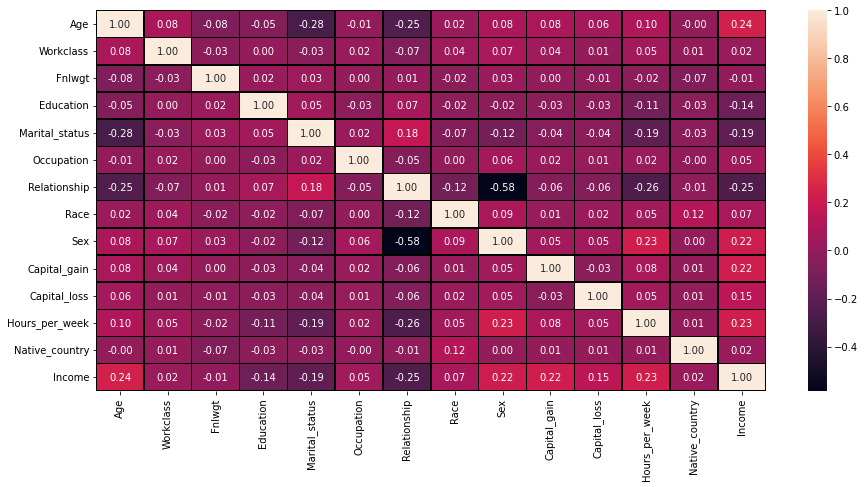

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="black", fmt='.2f')

We can see that the Column Fnlwgt is not coorelated with data set 

In [11]:
# Dropping the irrelevant columns..

df.drop(columns=["Fnlwgt"], axis=1, inplace=True)

# Descriptive Statistics

In [ ]:
df.describe()

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Capital Diff,Native_country
count,30161.00000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,0.56457,2.199231,4.737111,2.580087,5.960048,1.418355,0.859786,0.675674,1.244819,0.948079,0.088127
std,0.78848,0.953804,2.418174,1.498018,4.029487,1.601363,0.347215,0.468130,0.891499,0.221872,0.283484
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,2.000000,3.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,0.00000,2.000000,4.000000,2.000000,6.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000
75%,1.00000,2.000000,7.000000,4.000000,9.000000,3.000000,1.000000,1.000000,2.000000,1.000000,0.000000
max,2.00000,6.000000,8.000000,6.000000,13.000000,5.000000,1.000000,1.000000,2.000000,1.000000,1.000000


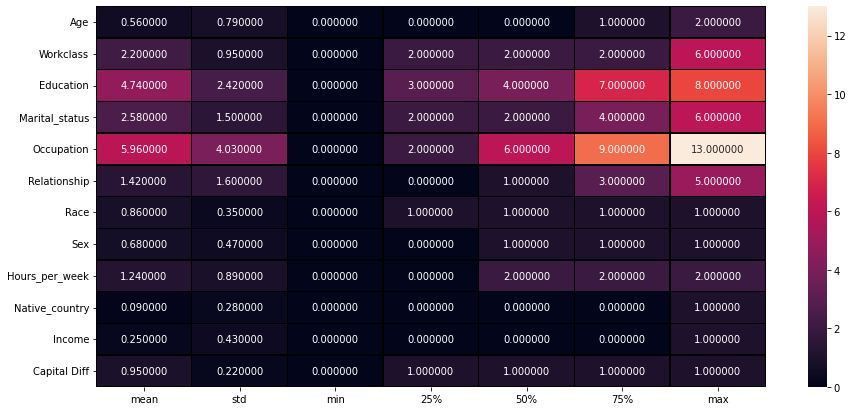

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(round(df.describe()[1:].transpose(),2), annot=True, linewidths=0.5,linecolor="black", fmt='f')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30161 entries, 0 to 32559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             30161 non-null  int64
 1   Workclass       30161 non-null  int64
 2   Education       30161 non-null  int64
 3   Marital_status  30161 non-null  int64
 4   Occupation      30161 non-null  int64
 5   Relationship    30161 non-null  int64
 6   Race            30161 non-null  int64
 7   Sex             30161 non-null  int64
 8   Capital_gain    30161 non-null  int64
 9   Capital_loss    30161 non-null  int64
 10  Hours_per_week  30161 non-null  int64
 11  Native_country  30161 non-null  int64
 12  Income          30161 non-null  int64
dtypes: int64(13)
memory usage: 4.2 MB


# Checking Data To Remove Skewness

In [ ]:
my_column1 = df.pop('Income')
df.insert(11,'Income', my_column1) 


df.head()

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Capital Diff,Income
0,0,4,2,2,3,0,1,1,1,0,1,0
1,0,2,4,0,5,1,1,1,2,0,1,0
2,1,2,7,2,5,0,0,1,2,0,1,0
3,0,2,2,2,9,5,0,0,2,1,1,0
4,0,2,5,2,3,5,1,0,2,0,1,0


In [13]:
df.iloc[:,:-1].skew()

Age                0.530223
Workclass          1.154786
Education         -0.019307
Marital_status    -0.009387
Occupation         0.110420
Relationship       0.820275
Race              -2.506976
Sex               -0.750584
Capital_gain      11.902511
Capital_loss       4.526294
Hours_per_week     0.330856
Native_country    -4.178826
dtype: float64

In [14]:
from sklearn.preprocessing import power_transform
x_new=power_transform(df.iloc[:,:-1],method='yeo-johnson')

df.iloc[:,:-1]=pd.DataFrame(x_new,columns=df.iloc[:,:-1].columns)

In [15]:
df.iloc[:,:-1].skew()

Age              -0.014021
Workclass         0.118248
Education        -0.144057
Marital_status   -0.114195
Occupation       -0.204979
Relationship      0.138751
Race             -2.079669
Sex              -0.750157
Capital_gain      3.010694
Capital_loss      4.249110
Hours_per_week    0.233759
Native_country   -2.935915
dtype: float64

# Outliers Checking

Age                  AxesSubplot(0.125,0.657941;0.133621x0.222059)
Workclass         AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Education          AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Marital_status    AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Occupation        AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Relationship         AxesSubplot(0.125,0.391471;0.133621x0.222059)
Race              AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Sex                AxesSubplot(0.44569,0.391471;0.133621x0.222059)
Capital_gain      AxesSubplot(0.606034,0.391471;0.133621x0.222059)
Capital_loss      AxesSubplot(0.766379,0.391471;0.133621x0.222059)
Hours_per_week          AxesSubplot(0.125,0.125;0.133621x0.222059)
Native_country       AxesSubplot(0.285345,0.125;0.133621x0.222059)
Income                AxesSubplot(0.44569,0.125;0.133621x0.222059)
dtype: object

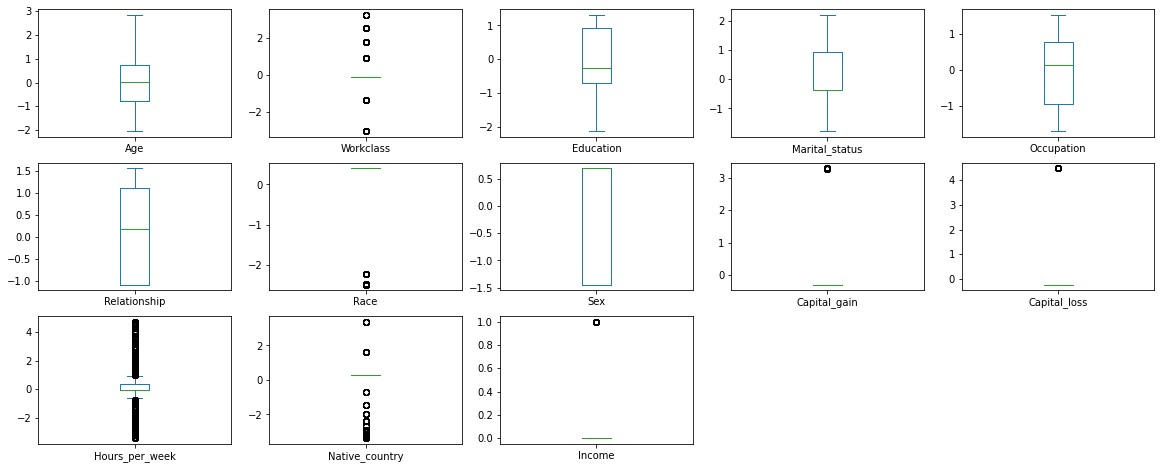

In [16]:
import warnings
warnings.filterwarnings('ignore')
df.plot(kind='box',subplots=True, layout=(3,5), figsize=[20,8])

# IQR Proximity Rule
Z - Score Technique

In [17]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(30161, 13)

In [18]:
threshold=3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [19]:
len(np.where(z>3)[0])

0

We can see that there are no outliers present 

# Feature Engineering ( Variantion Inflation Factor )

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
df.corr()

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.051460,-0.074405,-0.319856,-0.007439,-0.336160,0.025061,0.094834,0.120223,0.058412,0.155746,0.010589,0.002685
Workclass,0.051460,1.000000,0.011403,-0.022444,0.032092,-0.070083,0.062002,0.072640,0.014941,-0.002021,0.045752,0.002986,0.000782
Education,-0.074405,0.011403,1.000000,0.050613,-0.033908,0.076880,-0.026358,-0.020358,-0.044317,-0.027923,-0.112914,-0.045532,-0.008780
Marital_status,-0.319856,-0.022444,0.050613,1.000000,0.021672,0.260838,-0.079819,-0.113386,-0.059104,-0.036275,-0.189653,-0.036844,-0.001783
Occupation,-0.007439,0.032092,-0.033908,0.021672,1.000000,-0.060238,0.001368,0.080819,0.015537,0.019120,0.023778,-0.005225,0.002426
Relationship,-0.336160,-0.070083,0.076880,0.260838,-0.060238,1.000000,-0.139083,-0.609847,-0.104958,-0.071097,-0.284304,-0.015999,-0.004159
Race,0.025061,0.062002,-0.026358,-0.079819,0.001368,-0.139083,1.000000,0.105959,0.026866,0.026156,0.055019,0.153681,0.005656
Sex,0.094834,0.072640,-0.020358,-0.113386,0.080819,-0.609847,0.105959,1.000000,0.068632,0.042986,0.231457,-0.004378,0.005634
Capital_gain,0.120223,0.014941,-0.044317,-0.059104,0.015537,-0.104958,0.026866,0.068632,1.000000,-0.067500,0.078292,0.016406,0.008082
Capital_loss,0.058412,-0.002021,-0.027923,-0.036275,0.019120,-0.071097,0.026156,0.042986,-0.067500,1.000000,0.048820,0.015981,0.000370


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]), <a list of 13 Text major ticklabel objects>)

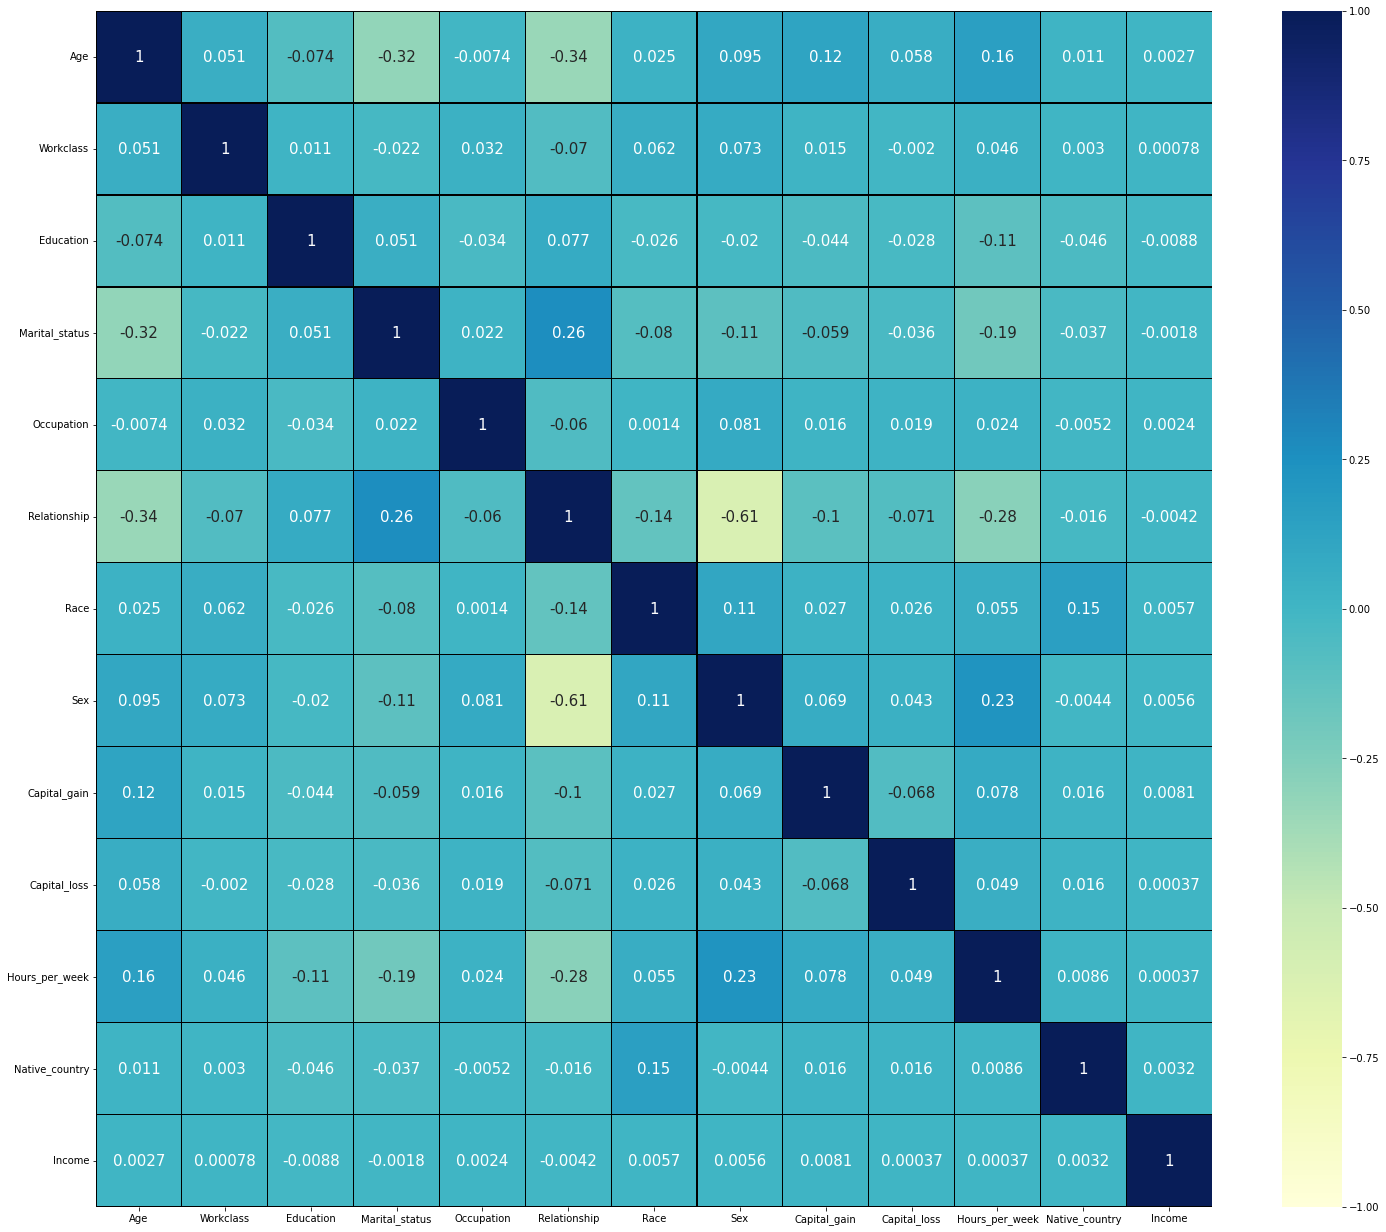

In [22]:
plt.figure(figsize=(25,22))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0)

Checking for null value Again

In [23]:
df.isnull().sum()

Age               2206
Workclass         2206
Education         2206
Marital_status    2206
Occupation        2206
Relationship      2206
Race              2206
Sex               2206
Capital_gain      2206
Capital_loss      2206
Hours_per_week    2206
Native_country    2206
Income               0
dtype: int64

In [24]:
df = df.dropna()

Splitting the Dataset and removing the Target Columns

In [25]:
x=df.drop('Income',axis=1)
y=df['Income']

In [26]:
x

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.921687,1.764229,-1.131852,-0.363182,-0.637276,-1.081605,0.403729,0.692823,-0.303052,-0.222851,-2.366569,0.297801
1,0.101182,-0.131781,-0.264005,-1.772166,-0.106908,0.167207,0.403729,0.692823,-0.303052,-0.222851,-0.071035,0.297801
2,1.102053,-0.131781,0.932863,-0.363182,-0.106908,-1.081605,-2.486277,0.692823,-0.303052,-0.222851,-0.071035,0.297801
3,-0.757066,-0.131781,-1.131852,-0.363182,0.783597,1.552150,-2.486277,-1.443370,-0.303052,-0.222851,-0.071035,-3.371734
4,0.023961,-0.131781,0.145973,-0.363182,-0.637276,1.552150,0.403729,-1.443370,-0.303052,-0.222851,-0.071035,0.297801
...,...,...,...,...,...,...,...,...,...,...,...,...
30154,1.102053,-0.131781,0.145973,-0.363182,-0.637276,-1.081605,0.403729,0.692823,-0.303052,-0.222851,-0.071035,0.297801
30156,-0.855518,-0.131781,-2.116781,-0.363182,1.363834,1.552150,0.403729,-1.443370,-0.303052,-0.222851,-0.237998,0.297801
30158,1.385437,-0.131781,-0.264005,2.199010,-1.704274,1.362672,0.403729,-1.443370,-0.303052,-0.222851,-0.071035,0.297801
30159,-1.395259,-0.131781,-0.264005,0.944759,-1.704274,1.110943,0.403729,0.692823,-0.303052,-0.222851,-1.760633,0.297801


In [27]:
y

0        0
1        0
2        0
3        0
4        0
        ..
30154    0
30156    0
30158    0
30159    0
30160    0
Name: Income, Length: 27955, dtype: int64

In [28]:
def vif_calc():
  vif=pd.DataFrame()
  vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
  vif["features"]=x.columns
  print(vif)

In [29]:
vif_calc()

    VIF Factor        features
0     1.247873             Age
1     1.012266       Workclass
2     1.023256       Education
3     1.168890  Marital_status
4     1.010577      Occupation
5     1.914801    Relationship
6     1.051701            Race
7     1.652554             Sex
8     1.030025    Capital_gain
9     1.015116    Capital_loss
10    1.128922  Hours_per_week
11    1.027498  Native_country


# Scaling the Data

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.920401,1.766698,-1.129093,-0.368947,-0.637033,-1.080801,0.403028,0.692962,-0.301894,-0.22359,-2.367131,0.297539
1,0.100513,-0.131494,-0.262486,-1.778251,-0.106135,0.167972,0.403028,0.692962,-0.301894,-0.22359,-0.069559,0.297539
2,1.100632,-0.131494,0.932671,-0.368947,-0.106135,-1.080801,-2.490800,0.692962,-0.301894,-0.22359,-0.069559,0.297539
3,-0.757091,-0.131494,-1.129093,-0.368947,0.785260,1.552873,-2.490800,-1.443080,-0.301894,-0.22359,-0.069559,-3.369462
4,0.023350,-0.131494,0.146905,-0.368947,-0.637033,1.552873,0.403028,-1.443080,-0.301894,-0.22359,-0.069559,0.297539
...,...,...,...,...,...,...,...,...,...,...,...,...
27950,1.100632,-0.131494,0.146905,-0.368947,-0.637033,-1.080801,0.403028,0.692962,-0.301894,-0.22359,-0.069559,0.297539
27951,-0.855469,-0.131494,-2.112614,-0.368947,1.366077,1.552873,0.403028,-1.443080,-0.301894,-0.22359,-0.236670,0.297539
27952,1.383803,-0.131494,-0.262486,2.193827,-1.705098,1.363401,0.403028,-1.443080,-0.301894,-0.22359,-0.069559,0.297539
27953,-1.394805,-0.131494,-0.262486,0.939290,-1.705098,1.111679,0.403028,0.692962,-0.301894,-0.22359,-1.760657,0.297539


# MODELLING FOR INCOME
# Building CLASSIFICATION Model As Target Column's Has only Two Outputs

0    21023
1     6932
Name: Income, dtype: int64


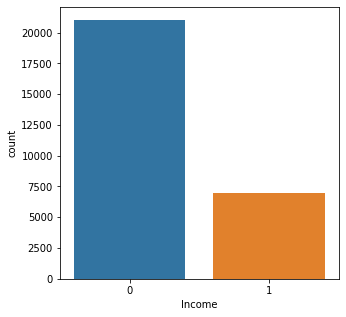

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df['Income'].value_counts())  
plt.figure(figsize=(5,5))
sns.countplot(df['Income'])
plt.show()

# OverSampling

In [32]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x, y = sm.fit_resample(x,y)
y.value_counts()

0    21023
1    21023
Name: Income, dtype: int64

# Modelling
# Getting the best random state

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.30, random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu*100," on Random_state ",maxRS) 

Best accuracy is  78.5159346757571  on Random_state  150


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Logistic Regression

In [35]:
# Checking Accuracy for Logistic Regression
log = LogisticRegression()
log.fit(x_train,y_train)

#Prediction
predlog = log.predict(x_test)

print(accuracy_score(y_test, predlog)*100)
print(confusion_matrix(y_test, predlog))
print(classification_report(y_test,predlog))

50.24575868083082
[[3089 3240]
 [3036 3249]]
              precision    recall  f1-score   support

           0       0.50      0.49      0.50      6329
           1       0.50      0.52      0.51      6285

    accuracy                           0.50     12614
   macro avg       0.50      0.50      0.50     12614
weighted avg       0.50      0.50      0.50     12614



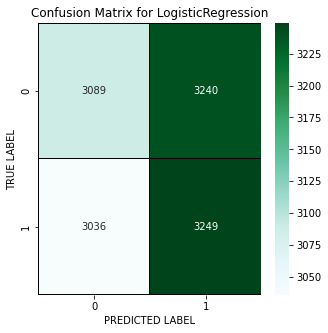

In [36]:
# Plotting Confusion_Matrix
cm = confusion_matrix(y_test,predlog)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for LogisticRegression')
plt.show()

# Random Forest Classifier

In [37]:
# Checking accuracy for Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

# Prediction
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

78.46044078008562
[[5347  982]
 [1735 4550]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80      6329
           1       0.82      0.72      0.77      6285

    accuracy                           0.78     12614
   macro avg       0.79      0.78      0.78     12614
weighted avg       0.79      0.78      0.78     12614



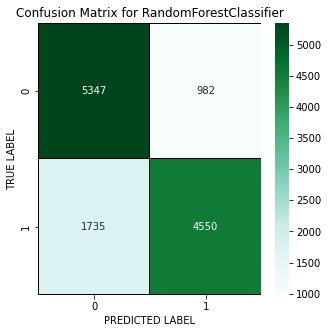

In [38]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_test,predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()


# Decission Tree Classifier

In [39]:
# Checking Accuracy for Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

#Prediction
preddtc = dtc.predict(x_test)

print(accuracy_score(y_test, preddtc)*100)
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test,preddtc))

71.04011415887109
[[4560 1769]
 [1884 4401]]
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      6329
           1       0.71      0.70      0.71      6285

    accuracy                           0.71     12614
   macro avg       0.71      0.71      0.71     12614
weighted avg       0.71      0.71      0.71     12614



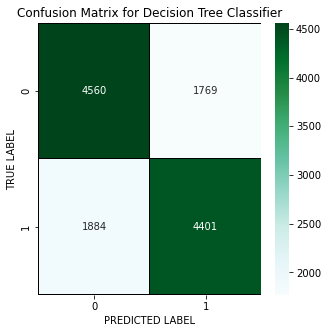

In [40]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_test,preddtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

#Support Vector Machine Classifier

In [41]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc)*100)
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

55.43047407642302
[[2679 3650]
 [1972 4313]]
              precision    recall  f1-score   support

           0       0.58      0.42      0.49      6329
           1       0.54      0.69      0.61      6285

    accuracy                           0.55     12614
   macro avg       0.56      0.55      0.55     12614
weighted avg       0.56      0.55      0.55     12614



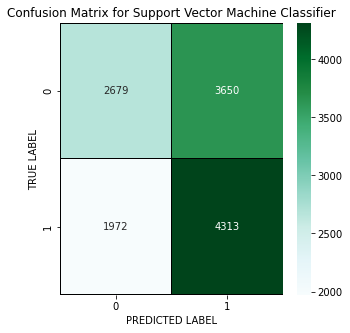

In [42]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_test,predsvc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

# Gradient Boosting Classifier

In [43]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB)*100)
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

72.80006342159506
[[5821  508]
 [2923 3362]]
              precision    recall  f1-score   support

           0       0.67      0.92      0.77      6329
           1       0.87      0.53      0.66      6285

    accuracy                           0.73     12614
   macro avg       0.77      0.73      0.72     12614
weighted avg       0.77      0.73      0.72     12614



Text(0.5, 1.0, 'Confusion Matrix for Gradient Boosting Classifier')

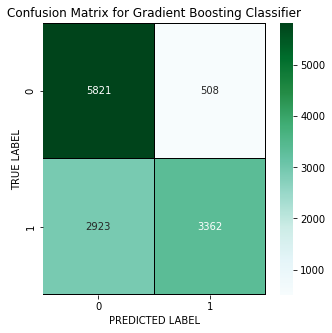

In [44]:
# Lets plot confusion matrix for Gradient Boosting Classifier
cm = confusion_matrix(y_test,predGB)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')

# Cross Validation Score

In [45]:
#cv score for Logistic Regression
print(cross_val_score(log,x,y,cv=5).mean()*100)

# cv score for Decision Tree Classifier
print(cross_val_score(dtc,x,y,cv=5).mean()*100)

# cv score for Random Forest Classifier
print(cross_val_score(rf,x,y,cv=5).mean()*100)

# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean()*100)

# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean()*100)

49.916764906633496
71.43403060731742
77.84139438394031
55.32752900924764
73.46533334634245


It is clear from the above that Random Forest Classifier is working the best with respect to Cross validation score as well which is minimum in the case..


So we move forward with Random Forest Classifier Model

# HyperParameter Tuning for the model with best score

In [46]:
#Random Forest Classifier

parameters = {'criterion':['gini'],
             'max_features':['auto'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,5,6,8]}

In [47]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [48]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3, 4, 5, 6, 8],
                         'max_features': ['auto'], 'n_estimators': [0, 200]})

In [49]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [50]:
Incomee =RandomForestClassifier (criterion='gini', max_depth=8, max_features='auto', n_estimators=200)
Incomee.fit(x_train, y_train)
pred = Incomee.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

70.04915173616617


# Plotting ROC and compare AUC for the final model

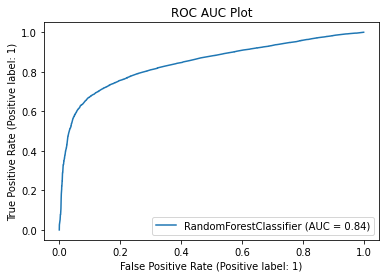

In [55]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

# Saving the model

In [53]:
import joblib
joblib.dump(Incomee,"Census_Income.pkl")

['Census_Income.pkl']

# Conclusion:
# The accuracy score for Income is 84 %